In [8]:
from acquire import wrangle_zillow
from prepare import remove_outliers

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = wrangle_zillow()

In [3]:
df, var_fences = remove_outliers(df)

fips column ignored


In [4]:
df.head()

,bed,bath,sqft,tax_value,year,fips,lot_sqft
4,4.0,2.0,3633.0,296425.0,2005.0,6037.0,9826.0
7,3.0,2.0,2077.0,646760.0,1926.0,6037.0,6490.0
18,3.0,1.0,1244.0,169471.0,1950.0,6037.0,6021.0
19,3.0,2.0,1300.0,233266.0,1950.0,6037.0,4917.0
20,3.0,2.0,1222.0,290492.0,1951.0,6037.0,5500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45421 entries, 4 to 56078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bed        45421 non-null  float64
 1   bath       45421 non-null  float64
 2   sqft       45421 non-null  float64
 3   tax_value  45421 non-null  float64
 4   year       45421 non-null  float64
 5   fips       45421 non-null  float64
 6   lot_sqft   45421 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [7]:
cont = ['bed','bath','sqft','year','lot_sqft']
cat = ['fips']
target = 'tax_value'

In [10]:
for col in cont:
    corr, p = stats.pearsonr(df[col], df['tax_value'])
    print(f'The correlation between {col} and tax_value is: {corr}\n')

The correlation between bed and tax_value is: 0.2071948671507457

The correlation between bath and tax_value is: 0.37739989667046714

The correlation between sqft and tax_value is: 0.45593499198804144

The correlation between year and tax_value is: 0.2675366486643441

The correlation between lot_sqft and tax_value is: 0.06868490297007561



### The highest correlation to tax_value is sqft with a correlation of .456
**The next highest is number of bathrooms** 

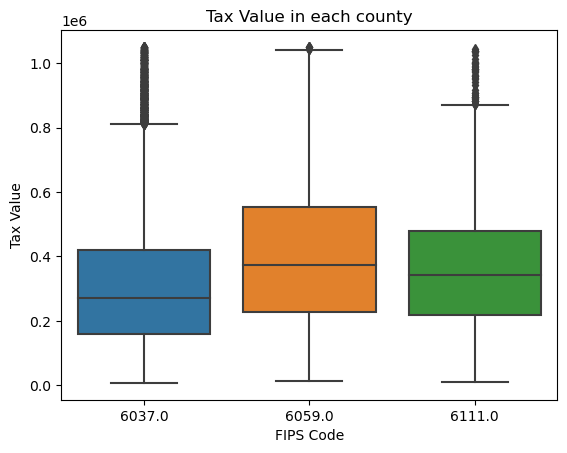

In [14]:
sns.boxplot(x='fips', y='tax_value',data=df)
plt.xlabel('FIPS Code')
plt.ylabel('Tax Value')
plt.title('Tax Value in each county')
plt.show()

Properties in Orange County have a higher average value than properties in Los Angelos and Ventura County.

In [17]:
la_county = df[df['fips']==6037]['tax_value']
orange_county = df[df['fips']==6059]['tax_value']
ventura_county = df[df['fips']==6111]['tax_value']

<AxesSubplot:>

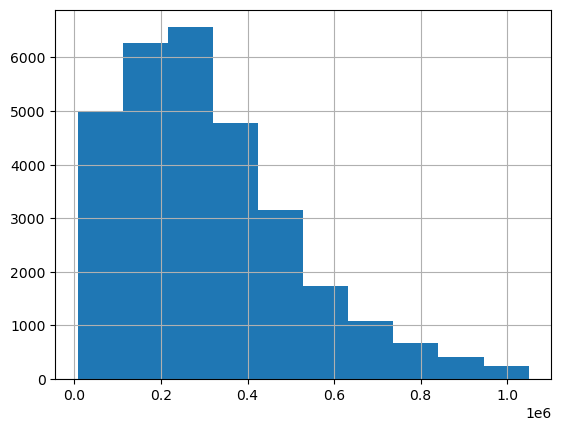

In [20]:
la_county.hist()

<AxesSubplot:>

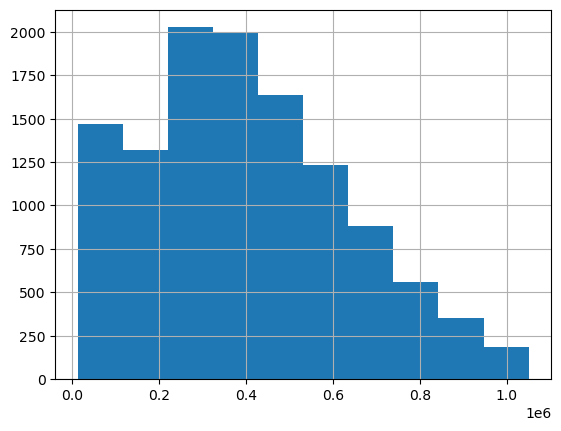

In [21]:
orange_county.hist()

<AxesSubplot:>

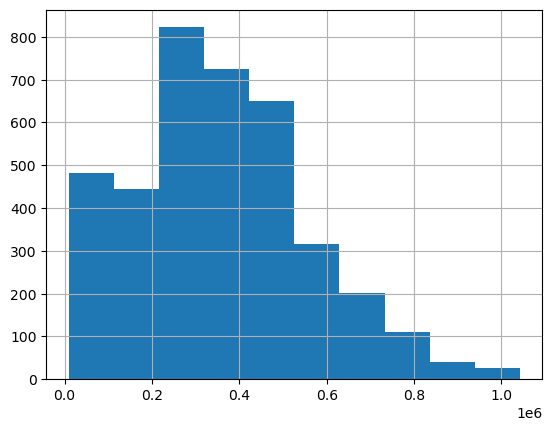

In [22]:
ventura_county.hist()

Null hypothesis: The average tax value is the same across all three counties.  
Alternate hypothesis: The average tax value is not the same across all three counties.

In [24]:
alpha = .05
f, p = stats.f_oneway(la_county, orange_county, ventura_county)
f, p

(796.1581610382282, 0.0)

In [25]:
if p < alpha:
    print("We reject the null.")
else:
    print("We fail to reject the null.")

We reject the null.


The p-value is lower than the alpha therefor the average tax value is not the same across all three counties.

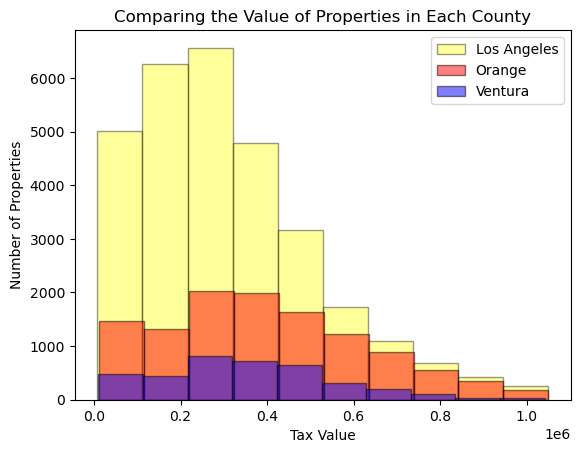

In [45]:
plt.hist(x = la_county, color = 'yellow', alpha = .4, edgecolor = 'black', label = 'Los Angeles')
plt.hist(x = orange_county, color = 'red', alpha = .5, edgecolor = 'black', label = 'Orange')
plt.hist(x = ventura_county, color = 'blue', alpha = .5, edgecolor = 'black', label = 'Ventura')
plt.xlabel('Tax Value')
plt.ylabel('Number of Properties')
plt.title('Comparing the Value of Properties in Each County')
plt.legend()
plt.show()

[Text(0, 6, '276644'),
 Text(0, 6, '320724'),
 Text(0, 6, '383611'),
 Text(0, 6, '446421')]

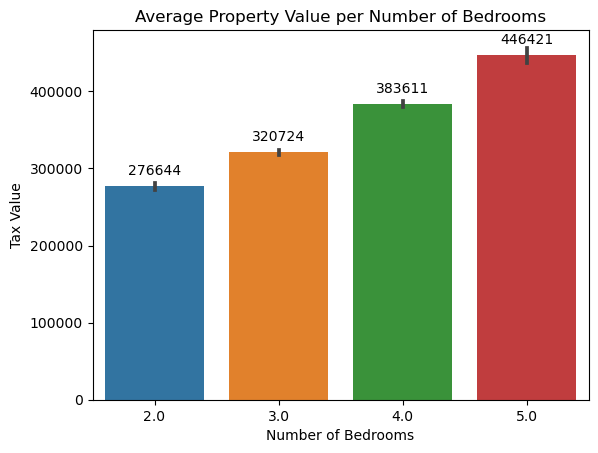

In [68]:
fig, ax = plt.subplots()
bplot = sns.barplot(x='bed', y='tax_value', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Tax Value')
plt.title('Average Property Value per Number of Bedrooms')
ax.bar_label(bplot.containers[0], padding= 6)

[Text(0, 14, '241490'),
 Text(0, 14, '269137'),
 Text(0, 14, '309013'),
 Text(0, 14, '456858'),
 Text(0, 14, '439740'),
 Text(0, 14, '629085'),
 Text(0, 14, '581417'),
 Text(0, 14, '734964')]

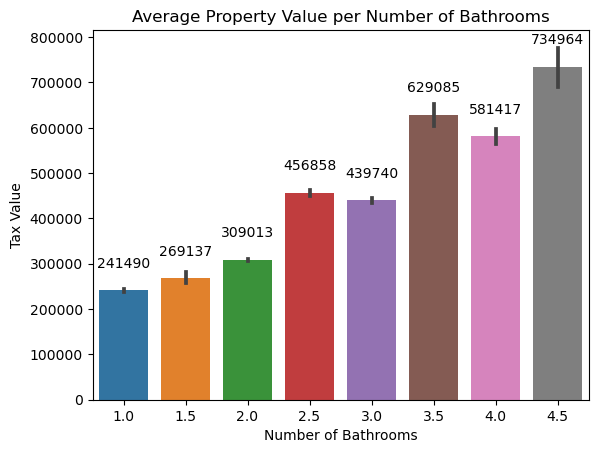

In [75]:
fig, ax = plt.subplots()
bplot = sns.barplot(x='bath', y='tax_value', data=df)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Tax Value')
plt.title('Average Property Value per Number of Bathrooms')
ax.bar_label(bplot.containers[0], padding= 14)

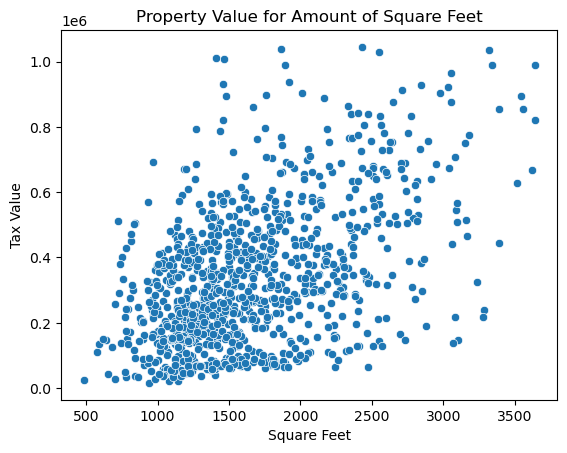

In [116]:
sns.scatterplot(x='sqft', y='tax_value', data=df.sample(1000))
plt.xlabel('Square Feet')
plt.ylabel('Tax Value')
plt.title('Property Value for Amount of Square Feet')
plt.show()

This chart shows there are more properties with lower square feet and lower property value.

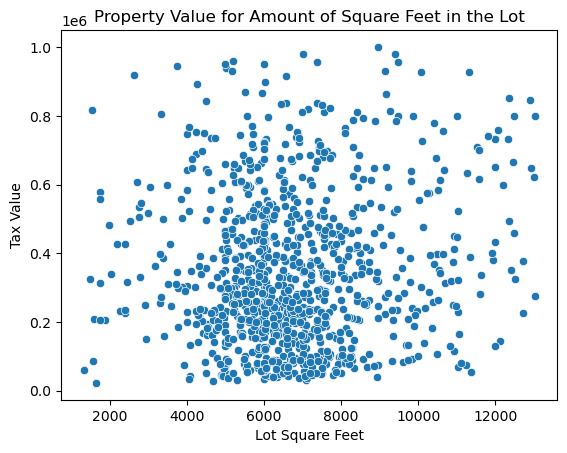

In [119]:
sns.scatterplot(x='lot_sqft', y='tax_value', data=df.sample(1000))
plt.xlabel('Lot Square Feet')
plt.ylabel('Tax Value')
plt.title('Property Value for Amount of Square Feet in the Lot')
plt.show()

This chart shows properties, on average, are more likely to have 5000-8000 sqft with a lower value.

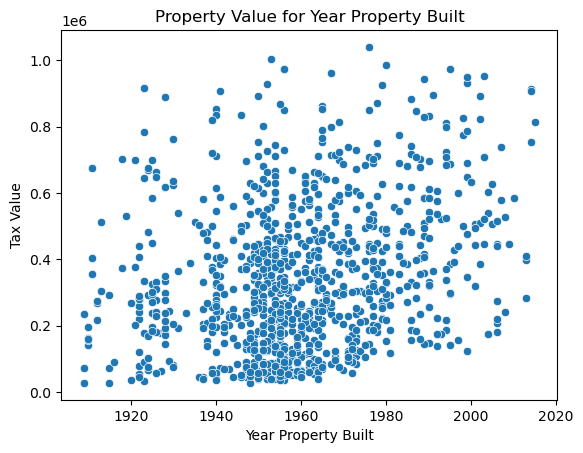

In [124]:
sns.scatterplot(x='year', y='tax_value', data=df.sample(1000))
plt.xlabel('Year Property Built')
plt.ylabel('Tax Value')
plt.title('Property Value for Year Property Built')
plt.show()

This chart shows properties are more likely to have been built between 1950 and 1970 and have a lower tax value.